# Taller Machine Learning con Scikit learn

<small> Parte 1: Clasificación supervisada
</small>




## 1.
A) Árboles de Decisión


Precision del arbol de decision: 1.00


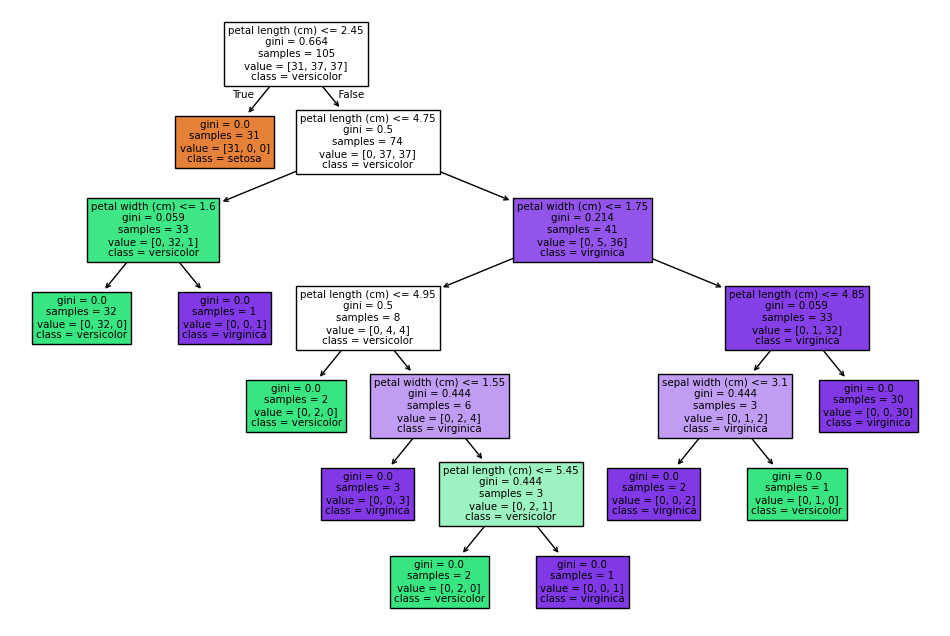

In [31]:
# importar las librerias

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


# Cargar datos
iris = (
    load_iris()
)  # Carga el famoso conjunto de datos Iris (información sobre 150 flores)
x = iris.data  # Guarda las características de las flores (como el largo del pétalo, ancho del sépalo, etc.)
y = iris.target  # Guarda el tipo de flor (hay 3 especies diferentes)


# Dividir datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)  # Esta línea divide todos los datos en dos grupos:
# 70% para entrenar el modelo (X_train, y_train)
# 30% para probar qué tan bien funciona (X_test, y_test)

# random_state=42 asegura que siempre obtengamos la misma división aleatoria

# Crear el modelo de arbol de decision
Ardes = DecisionTreeClassifier(random_state=42) #variable que guarda el modelo de árbol de decisión
Ardes.fit(x_train, y_train)  # Entrena el modelo con los datos de entrenamiento


# Predecir con datos de prueba
Y_pred = Ardes.predict(
    x_test
)  

# Evaluar exactitud
accuracy = (Y_pred == y_test).mean()
print(f"Precision del arbol de decision: {accuracy:.2f}")


# Visualizar el árbol
plt.figure(figsize=(12, 8))
plot_tree(
    Ardes, feature_names=iris.feature_names, class_names=iris.target_names, filled=True
)
plt.show()



##  B . Random Forest


In [32]:
from sklearn.ensemble import (
    RandomForestClassifier,
)  # Esta linea importa la herramienta RandomForestClassifier que es un algoritmo de machine learning mas avanzado que el arbol de decision simple
# Crear el modelo Random Forest con 100 arboles

forest = RandomForestClassifier(
    n_estimators=100, random_state=42
)  # tenemos 100 expertos (arboles de decision) que votan por la mejor respuesta
# Entrenar el modelo Random Forest con los datos de entrenamiento
forest.fit(x_train, y_train)
# Predecir
y_pred_rf = forest.predict(
    x_test
)  # El modelo Random Forest ahora predice qué tipo de flor es cada una en el grupo de prueba.
# Evaluar
accuracy_rf = (y_pred_rf == y_test).mean()
print(f"Precision del Random Forest: {accuracy_rf:.2f}")


Precision del Random Forest: 1.00


## 
C. Support Vector Machine (SVM)


In [33]:
from sklearn.svm import (
    SVC,
)  # Importa el clasificador SVC (Support Vector Classifier) que es otro algoritmo de machine learning
import numpy as np

# Solo dos clases para visualizar mejor el 0 y 1

idx = np.where(y != 2)  
x_binary = x[idx]
y_binary = y[idx]

x_train, x_test, y_train, y_test = train_test_split(
    x_binary, y_binary, test_size=0.3, random_state=42
)  # Divide los datos binarios en entrenamiento y prueba

# Crear el modelo SVC con kernel RBF (Radial Basis Function)
svm_clf = SVC(kernel="rbf", gamma='scale', random_state=42)
svm_clf.fit(x_train, y_train)  # Entrena el clasificador con los datos de entrenamiento

# Predecir
y_pred_svm = svm_clf.predict(x_test)

# Evaluar la precisión del modelo
accuracy_svm = (y_pred_svm == y_test).mean()
print(f"Precisión del SVC con kernel RBF: {accuracy_svm:.2f}")



Precisión del SVC con kernel RBF: 1.00


## Parte 2
. K-Means


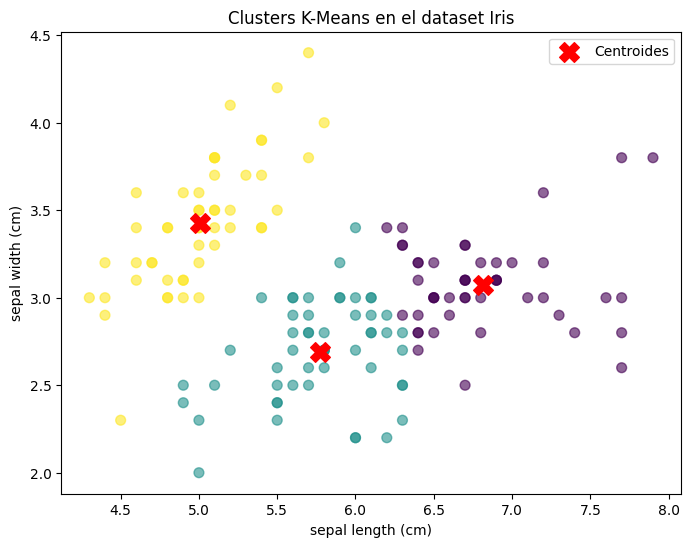

In [34]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import load_iris

# Carga el dataset Iris y usa solo las dos primeras características
iris = load_iris()
X = iris.data[:, :2]  # Solo las primeras dos características para facilitar la visualización
y = iris.target  # Etiquetas reales

# 2. Aplica K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Visualiza los clusters de K-Means y sus centroides
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, s=50, cmap="viridis", alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", marker="X", s=200, label="Centroides")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.title("Clusters K-Means en el dataset Iris")
plt.show()



## 3. Aplica DBSCAN


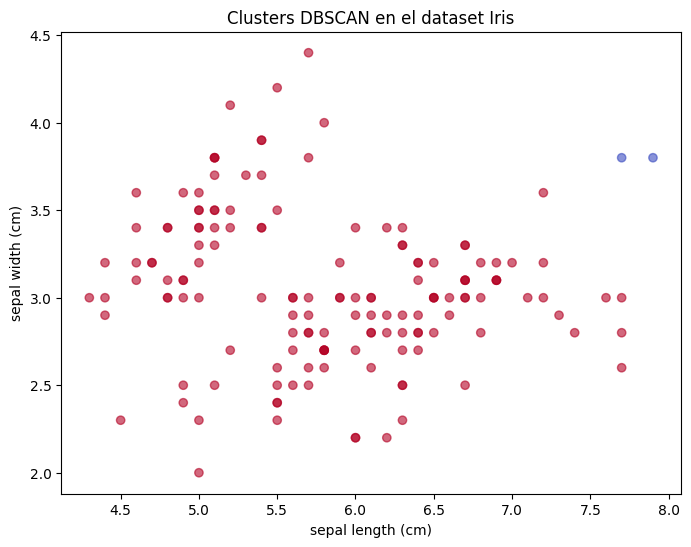

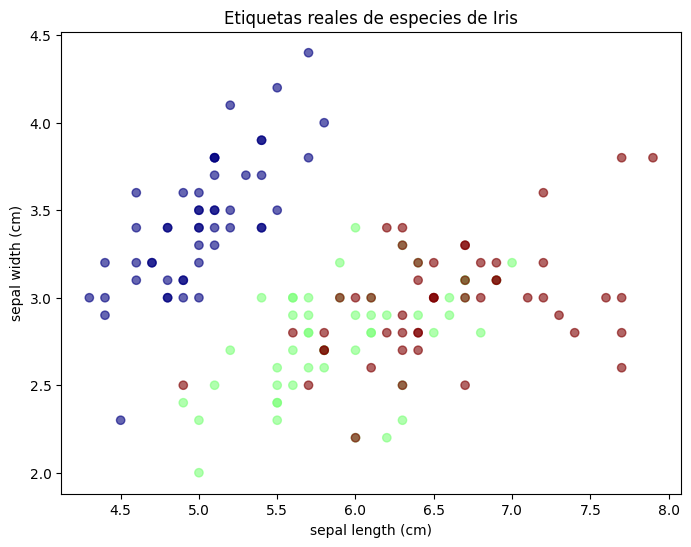

In [35]:
from sklearn.cluster import DBSCAN

# Importa el algoritmo DBSCAN para agrupar datos
import numpy as np

# Carga el dataset Iris y usa solo las dos primeras características
iris = load_iris()
X = iris.data[:, :2]  # Usa las primeras dos características para visualización
y = iris.target  # Etiquetas reales

# Aplica DBSCAN con eps=0.5 y min_samples=5
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

# Visualiza los clusters y los puntos etiquetados como ruido
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap="coolwarm", alpha=0.6)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Clusters DBSCAN en el dataset Iris")
plt.show()

# Comparación con etiquetas reales
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="jet", alpha=0.6)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Etiquetas reales de especies de Iris")
plt.show()



# Preguntas 
 1 ¿Cuál modelo supervisado tuvo mejor precisión? ¿Por qué?
El modelo supervisado con mejor precisión fue Random Forest porque combina varios árboles de decisión, lo que mejora la exactitud y reduce el sobreajuste.

2 ¿Cómo se relacionan los clusters de K-Means con las clases reales? 
Los clusters de K-Means se parecen a las clases reales, pero no coinciden exactamente. Identifica bien algunas especies, pero puede confundir las más parecidas.

3 ¿Qué utilidad tiene DBSCAN en comparación con KMeans? 
DBSCAN puede encontrar clusters de forma arbitraria y detectar ruido, mientras que KMeans solo detecta grupos esféricos y no identifica puntos atípicos.

4 ¿Qué ventajas y desventajas tiene un árbol de decisión frente a un Random Forest? 

Ventajas del árbol de decisión:

Es fácil de entender y visualizar.
Rápido de entrenar y predecir.
Desventajas frente a Random Forest:

Tiende a sobreajustarse a los datos.
Menor precisión y robustez.
Ventajas de Random Forest:

Mayor precisión y generalización.
Menos sensible al sobreajuste.
Desventaja:

Es más complejo y menos interpretable que un solo árbol.

5 ¿Cómo ayuda la visualización del árbol para interpretar el modelo? 
La visualización del árbol permite entender fácilmente cómo el modelo toma decisiones, mostrando qué características usa y en qué orden. Así, se puede interpretar cada paso y ver cómo se llega a una predicción final.


